# Project: Machine learning for classification.

Le but de ce projet est d'étudier la capacité de plusieurs machines d'apprentissage à construire un classificateur de chiffres manuscrits. 


# Réaliser par:
     1- Djiomou Ngongang Cédric Charly
     2- Babou Traore

In [24]:
#The packages
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn import datasets
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis,LinearDiscriminantAnalysis
from sklearn import linear_model
from sklearn.model_selection import KFold

# Data description

The dataset contains a sample of handwritten digits. Each digit is described by an image of 8 ∗ 8 pixels in normalized grayscale.
there are 64 features and 1797 instances. The target data contains 9 categories.


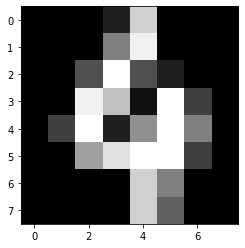

In [25]:
# Dataset

digits = datasets.load_digits()
X=digits.data;
y=digits.target;
obs=X[100,:]; label=y[100];
image=np.array(obs, dtype='uint8').reshape(8,8);
plt.imshow(image, cmap='gray')
plt.show()

# Traitement des données

 Le traitement des données consistera simplement pour nous à réduire les données au seules données correspondant aux deux digits choisis.
 
 Une fois fait, nous obtenons 350 observations sur 1797 au départ qui représente une perte énorme.

In [26]:
# preprocessing dataset.
# transforms target data
# Our digits choices
digit=[0,8]
def transforms(digit= digit,method=1):
    # method= 1:remove all data which are different from the digit input
    # method= different from 1: We  trasform into -10 all data which are different from 0 and 8,and into 10 else
    # digit: Our target choices. Could be different.
    target=digit 
    if method==1:
        index=[]
        for i in range(len(y)):
            if y[i] not in target:
                index.append(i)
        # delete data different from 0 and 8
        y_target=np.delete(y,index)
        X_features=np.delete(X,index,axis=0)
    else:
        y_target=[]
        for i in y:
            if i in target:
                y_target.append(10)
            else: 
                y_target.append(-10)
        X_features=X
        
    return(y_target,X_features)    
            


# Apprentissage et validation des modèles

In [27]:
# Function to use in the whole project
def dataframe(train_score,test_score,score):
    res=pd.DataFrame([round(train_score,4)*100,round(test_score,4)*100,round(score,4)*100],index=["Trainset","Testset","Dataset"])
    res.columns=["Accuracy(%)"]
    return(res)  
# fonction qui nous aidera à afficher les résultats sous forme de tableau.

In [28]:
# split into training and test part

X_train, X_test, Y_train, Y_test = train_test_split(X_features, y_target, test_size=.4, random_state=0)

In [29]:
# Naives Bayes

gnb = GaussianNB();
gnbfit=gnb.fit(X_train, Y_train);
dataframe(train_score=gnb.score(X_train, Y_train),test_score=gnb.score(X_test, Y_test),score=gnb.score(X_features, y_target))

,Accuracy(%)
Trainset,99.53
Testset,100.00
Dataset,99.72


In [30]:
#Linear Discriminant Analysis

lda = LinearDiscriminantAnalysis(solver='lsqr');
ldafit=lda.fit(X_train,Y_train)
dataframe(train_score=lda.score(X_train, Y_train),test_score=lda.score(X_test, Y_test),score=lda.score(X_features, y_target))

,Accuracy(%)
Trainset,100.0
Testset,100.0
Dataset,100.0


In [15]:
#Logistic regression

lgr = linear_model.LogisticRegression(solver="lbfgs");
lgrfit=lgr.fit(X_train,Y_train)
dataframe(train_score=lgr.score(X_train, Y_train),test_score=lgr.score(X_test, Y_test),score=lgr.score(X_features, y_target))

,Accuracy(%)
Trainset,100.0
Testset,100.0
Dataset,100.0


In [16]:
# Neighbors
 
knn=KNeighborsClassifier()
knnfit=knn.fit(X_train,Y_train)
dataframe(train_score=knn.score(X_train, Y_train),test_score=knn.score(X_test, Y_test),score=knn.score(X_features, y_target))

,Accuracy(%)
Trainset,100.0
Testset,100.0
Dataset,100.0


In [17]:
# Decision tree

tree = DecisionTreeClassifier()
treefit = tree.fit(X_train, Y_train);
dataframe(train_score=tree.score(X_train, Y_train),test_score=tree.score(X_test, Y_test),score=tree.score(X_features, y_target))

,Accuracy(%)
Trainset,100.00
Testset,98.58
Dataset,99.43


In [19]:
# Summary of all Classifiers

names=["NBayes","KNeighbors","LDA","Logreg","Dtree"]
classifiers = [
    GaussianNB(),
    KNeighborsClassifier(n_neighbors=2),
    LinearDiscriminantAnalysis(solver='lsqr'),
    linear_model.LogisticRegression(solver='lbfgs'),
    DecisionTreeClassifier(),
    ]
train_score=[]
test_score=[]
dataset_score=[]
# iterate over classifiers
for name, clf in zip(names, classifiers):
    clf.fit(X_train, Y_train)
    train_score.append(round(clf.score(X_train, Y_train),4)*100)
    test_score.append(round(clf.score(X_test, Y_test),4)*100)
    dataset_score.append(round(clf.score(X_features,y_target),4)*100)
        
        

Accuracy=pd.DataFrame([train_score,test_score,dataset_score],index=["Training set","Test set","Dataset"])
Accuracy.columns=names
Accuracy

,NBayes,KNeighbors,LDA,Logreg,Dtree
Training set,99.53,100.0,100.0,100.0,100.0
Test set,100.00,100.0,100.0,100.0,100.0
Dataset,99.72,100.0,100.0,100.0,100.0


  Nous remarquons à l'issue de l'entraînement de ces quatre classifieurs, une performance de 100% sur les données d'entraînement, de test et sur l'ensemble des données pour tous les modèles sauf ceux du  Naive Bayes qui sont tout de même proche de 100%.  nous allons essayer d'améliorer avec les méthoses d'ensemble. 
  
  La précision de l'arbre à décision est de 100% en entraînement et de 99.29 en génération avec une légère variance de moins de 1%. Nous aimerions que la performance en génération soit aumoins égale à la performance en entraînement. Nous essayerons de l'améliorer.
  
  Une performance de 100% laisserait penser que nos modèles sont parfaits.Toutefois nous sommes plutôt sceptiques quant à ces valeurs et soupçonons que la quantité insuffisante des données qui est davantage réduite avec la méthode de recodage de notre variabe cible pourrait expliquer une telle performance.
 

### Amélioration de la performance du modèle Gaussien et de l'arbre à décision

 En temps normal, la précision de 99.53% obtenues pour le modèle gaussien est en principe une bonne performance pour un modèle mais pour des raisons pédagogiques, nous essayerons de voir l'impact des méthodes d'ensembles telles que le random forest, le Bagging et l'Adaboost sur la performance.
 
 Nous allons donc utiliser le random forest pour l'arbre à décision et le Bagging et l'Adaboost pour les deux modèles.

In [20]:
# Random forest pour l'arbre à décision

# Training with various n_estimators
n=[10,15,20,25,30,35,40]
train_score_RF=[]
test_score_RF=[]
score_RF=[]
for i in n:
    RF = RandomForestClassifier(random_state=0,n_estimators=i)
    RFfit=RF.fit(X_train, Y_train)
    train_score_RF.append(round(RFfit.score(X_train, Y_train),4)*100)
    test_score_RF.append(round(RFfit.score(X_test, Y_test),4)*100)
    score_RF.append(round(RFfit.score(X_features, y_target),4)*100)
    
    
Accuracy_RF=pd.DataFrame([train_score_RF,test_score_RF,score_RF],index=["Training set","Test set","Dataset"])
Accuracy_RF.columns=n
Accuracy_RF

,10,15,20,25,30,35,40
Training set,100.00,100.0,100.0,100.0,100.0,100.0,100.0
Test set,99.29,100.0,100.0,100.0,100.0,100.0,100.0
Dataset,99.72,100.0,100.0,100.0,100.0,100.0,100.0


La performance du modèle de l'arbre à décision s'améliore avec le random forest à partir de 15 arbres en  entrée.

Nous allons regarder ce qu'il en est du Boosting et du Bagging.

In [21]:
#Adaboost pour les deux modèles
names1=["NBayes","Dtree"]
classifiers1 = [GaussianNB(),DecisionTreeClassifier()]
n=[10,15,20,25,30,35,40,50]
# iterate over classifiers
for name, clf in zip(names1, classifiers1):
    train_score_ab1=[]
    test_score_ab1=[]
    score_ab1=[]
# Training with various n_estimators
    for i in n:
        Ab1 = AdaBoostClassifier(base_estimator=clf,n_estimators=i)
        Ab1fit=Ab1.fit(X_train, Y_train)
        train_score_ab1.append(round(Ab1fit.score(X_train, Y_train),4)*100)
        test_score_ab1.append(round(Ab1fit.score(X_test, Y_test),4)*100)
        score_ab1.append(round(Ab1fit.score(X_features, y_target),4)*100)
    
    
    Accuracy_ab=pd.DataFrame([train_score_ab1,test_score_ab1,score_ab1],index=["Training set","Test set","Dataset"])
    Accuracy_ab.columns=n
    print("Adaboost pour:",name,"\n",Accuracy_ab,"\n")

Adaboost pour: NBayes 
                   10      15      20      25      30      35      40      50
Training set  100.00  100.00  100.00  100.00  100.00  100.00  100.00  100.00
Test set       98.58   98.58   98.58   98.58   98.58   98.58   98.58   98.58
Dataset        99.43   99.43   99.43   99.43   99.43   99.43   99.43   99.43 

Adaboost pour: Dtree 
                  10     15     20      25     30     35     40      50
Training set  100.0  100.0  100.0  100.00  100.0  100.0  100.0  100.00
Test set      100.0  100.0  100.0   98.58  100.0  100.0  100.0   98.58
Dataset       100.0  100.0  100.0   99.43  100.0  100.0  100.0   99.43 



  Tout d'abord, on remarque que le biais du modèle du Naive Bayes est améliorée par l'adaboost mais la variance est détériorée. Le modèle Naive Bayes est préféré à son corrolaire Adaboost.
 
  Ensuite, la performance globale de l'arbre à décision est également améliorée avec l'Adaboost à 10 arbres quand le random forest le fait avec 15 arbres. Nous préferons donc le modèle d'arbres à décision à 10 arbres. 
  
 Qu'en est-il du bagging?

In [22]:
# Bagging pour les deux modèles
names1=["NBayes","Dtree"]
classifiers1 = [GaussianNB(),DecisionTreeClassifier()]
n=[10,15,20,25,30,35,40,50]
# iterate over classifiers
for name, clf in zip(names1, classifiers1):
    train_score_bg1=[]
    test_score_bg1=[]
    score_bg1=[]
# Training with various n_estimators
    for i in n:
        bg1 = BaggingClassifier(base_estimator=clf,n_estimators=i)
        bg1fit=bg1.fit(X_train, Y_train)
        train_score_bg1.append(round(bg1fit.score(X_train, Y_train),4)*100)
        test_score_bg1.append(round(bg1fit.score(X_test, Y_test),4)*100)
        score_bg1.append(round(bg1fit.score(X_features, y_target),4)*100)
    
    
    Accuracy_bg1=pd.DataFrame([train_score_bg1,test_score_bg1,score_bg1],index=["Training set","Test set","Dataset"])
    Accuracy_bg1.columns=n
    print("Bagging pour:",name,"\n",Accuracy_bg1,"\n")

Bagging pour: NBayes 
                   10     15      20      25      30      35      40      50
Training set   99.53  99.53   99.53   99.53   99.53   99.53   99.53   99.53
Test set      100.00  99.29  100.00  100.00  100.00  100.00  100.00  100.00
Dataset        99.72  99.43   99.72   99.72   99.72   99.72   99.72   99.72 

Bagging pour: Dtree 
                   10     15      20      25      30      35     40      50
Training set  100.00  99.53  100.00  100.00  100.00  100.00  100.0  100.00
Test set       99.29  99.29   99.29   99.29   99.29   99.29  100.0   99.29
Dataset        99.72  99.43   99.72   99.72   99.72   99.72  100.0   99.72 



 Le bagging conserve le même modèle du Naive Bayes classique et le même modèle de l'arbre à décision classique.
 
 En résumé pour cette methode de recodage de la variable cible, le meilleur classifieur:
 
 pour le Naive Baye est celui du Naive Bayes classique.
 pour l'arbre à décision est celui avec le Adaboost avec 10 arbres
 Pour le LDA,KNN et logistique, est leur modèle classique.
 

### Les meilleurs modèles

In [23]:
# En résumé

names=["NBayes","KNeighbors","LDA","Logreg","Adaboost"]
classifiers_best = [
    GaussianNB(),
    KNeighborsClassifier(),
    LinearDiscriminantAnalysis(solver='lsqr'),
    linear_model.LogisticRegression(solver='lbfgs'),
    AdaBoostClassifier(base_estimator=clf,n_estimators=10),
    ]
train_score_best=[]
test_score_best=[]
dataset_score_best=[]
# iterate over classifiers
for name, clf in zip(names, classifiers_best):
    clf.fit(X_train, Y_train)
    train_score_best.append(round(clf.score(X_train, Y_train),4)*100)
    test_score_best.append(round(clf.score(X_test, Y_test),4)*100)
    dataset_score_best.append(round(clf.score(X_features,y_target),4)*100)
        
        

Accuracy_best=pd.DataFrame([train_score_best,test_score_best,dataset_score_best],index=["Training set","Test set","Dataset"])
Accuracy_best.columns=names
Accuracy_best

,NBayes,KNeighbors,LDA,Logreg,Adaboost
Training set,99.53,100.0,100.0,100.0,100.00
Test set,100.00,100.0,100.0,100.0,98.58
Dataset,99.72,100.0,100.0,100.0,99.43


 Pour le choix d'un modèle, nous écartons le Naive bayes et sommes indifférents pour les quatre autres.